In [4]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

Enter the initial prey 1 population:  1000
Enter the initial prey 2 population:  1000
Enter the initial middle predator 1 population:  20
Enter the initial middle predator 2 population:  20
Enter the initial apex predator population:  10


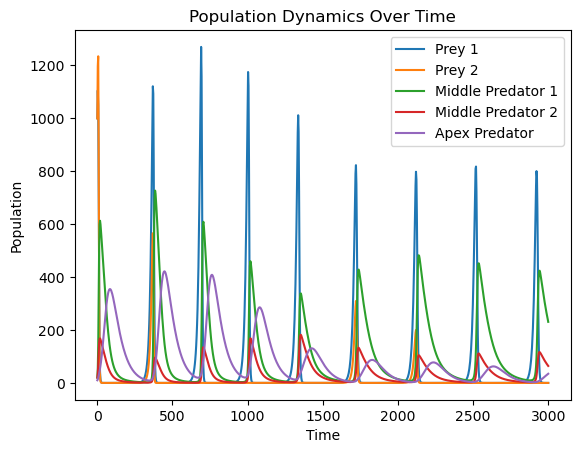

0.0044212032237454625
4.2447989172781165e-10
230.85574010769977
64.17927135968179
34.6470885162028


In [18]:
# Model 5a (Chain 2): 2 prey, 2 middle predators, and 1 apex predator
# middle predator 1 can eat both prey, middle predator 2 can eat only 1 prey, apex predator can eat all prey and middle predators
# without carrying capacity

# x1 = population density of prey 1
# x2 = population density of prey 2
# y1 = population density of middle predator 1
# y2 = population density of middle predator 2
# z = population density of apex predator

# Initializing parameters
a1 = 0.08 # prey 1 growth rate
a2 = 0.09 # prey 2 growth rate

b11 = 0.0004 # middle predator 1 kill rate of prey 1
b12 = 0.0009 # middle predator 1 kill rate of prey 2
b21 = 0.0012 # middle predator 2 kill rate of prey 1
b31 = 0.00006 # apex predator kill rate of prey 1
b32 = 0.00005 # apex predator kill rate of prey 2
b33 = 0.0006 # apex predator kill rate of middle predator 1
b34 = 0.0003 # apex predator kill rate of middle predator 2

c1 = 0.01 # middle predator 1 death rate
c2 = 0.01 # middle predator 2 death rate
c3 = 0.0175 # apex predator death rate

d11 = 0.0002 # middle predator 1 growth rate from eating prey 1
d12 = 0.0001 # middle predator 1 growth rate from eating prey 2
d21 = 0.0002 # middle predator 2 growth rate from eating prey 1
d31 = 0.00005 # apex predator growth rate from eating prey 1
d32 = 0.00005 # apex predator growth rate from eating prey 2
d33 = 0.0001 # apex predator growth rate from eating middle predator 1
d34 = 0.0001 # apex predator growth rate from eating middle predator 2

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y1, y2, z = S
    return [a1*x1 - b11*x1*y1 - b21*x1*y2 - b31*x1*z,
            a2*x2 - b12*x2*y1 - b32*x2*z,
            -c1*y1 + d11*x1*y1 + d12*x2*y1 - b31*y1*z,
            -c2*y2 + d21*x1*y2 - b32*y2*z,
            -c3*z + d31*x1*z + d32*x2*z + d33*y1*z + d34*y2*z
           ]

# Initializing population densities
x10 = float(input("Enter the initial prey 1 population: ")) # for example: 1000
x20 = float(input("Enter the initial prey 2 population: ")) # for example: 1000
y10 = float(input("Enter the initial middle predator 1 population: ")) # for example: 20
y20 = float(input("Enter the initial middle predator 2 population: ")) # for example: 20
z0 = float(input("Enter the initial apex predator population: ")) # for example: 10
S0 = (x10, x20, y10, y20, z0)

t = np.linspace(0, 3000, 1000) # time array

# Solving differential equations
sol1 = odeint(dSdt, S0, t)

sol1_x1 = sol1[:, 0] # prey 1 population over time
sol1_x2 = sol1[:, 1] # prey 2 population over time
sol1_y1 = sol1[:, 2] # middle predator 1 population over time
sol1_y2 = sol1[:, 3] # middle predator 2 population over time
sol1_z = sol1[:, 4] # apex predator population over time

# Plotting populations over time
plt.plot(t, sol1_x1, label = "Prey 1")
plt.plot(t, sol1_x2, label = "Prey 2")
plt.plot(t, sol1_y1, label = "Middle Predator 1")
plt.plot(t, sol1_y2, label = "Middle Predator 2")
plt.plot(t, sol1_z, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()

print(sol1_x1[-1])
print(sol1_x2[-1])
print(sol1_y1[-1])
print(sol1_y2[-1])
print(sol1_z[-1])

Enter the initial prey 1 population:  1000
Enter the initial prey 2 population:  1000
Enter the initial middle predator 1 population:  20
Enter the initial middle predator 2 population:  20
Enter the initial apex predator population:  10


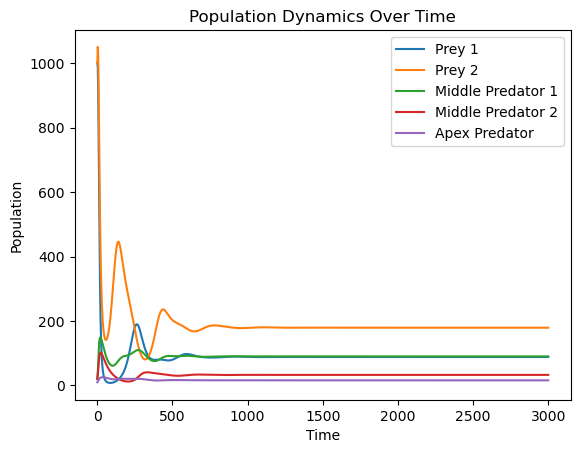

In [28]:
# Model 5b (Chain 2): 2 prey, 2 middle predators, and 1 apex predator
# middle predator 1 can eat both prey, middle predator 2 can eat only 1 prey, apex predator can eat all prey and middle predators
# with carrying capacity

# carrying capacity of an environment = the maximum population size of a biological species that can be 
# sustained by that specific environment, given the food, habitat, water, and other resources available (Wikipedia)

k11 = 2000 # carrying capacity of prey 1 population
k12 = 2000 # carrying capacity of prey 2 population
k21 = 200 # carrying capacity of middle predator 1 population
k22 = 200 # carrying capacity of middle predator 2 population
k3 = 50 # carrying capacity of apex predator population

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x1, x2, y1, y2, z = S
    return [a1*x1*(1-x1/k11) - b11*x1*y1 - b21*x1*y2 - b31*x1*z,
            a2*x2*(1-x2/k12) - b12*x2*y1 - b32*x2*z,
            -c1*y1 + d11*x1*y1*(1-y1/k21) + d12*x2*y1*(1-y1/k21) - b33*y1*z,
            -c2*y2 + d21*x1*y2*(1-y2/k22) - b34*y2*z,
            -c3*z + (d31*x1*z + d32*x2*z + d33*y1*z + d34*y2*z)*(1-z/k3)
           ]

# Initializing population densities
x10 = float(input("Enter the initial prey 1 population: ")) # for example: 1000
x20 = float(input("Enter the initial prey 2 population: ")) # for example: 1000
y10 = float(input("Enter the initial middle predator 1 population: ")) # for example: 20
y20 = float(input("Enter the initial middle predator 2 population: ")) # for example: 20
z0 = float(input("Enter the initial apex predator population: ")) # for example: 10
S0 = (x10, x20, y10, y20, z0)

t = np.linspace(0, 3000, 1000) # time array

# Solving differential equations
sol2 = odeint(dSdt, S0, t)

sol2_x1 = sol2[:, 0] # prey 1 population over time
sol2_x2 = sol2[:, 1] # prey 2 population over time
sol2_y1 = sol2[:, 2] # middle predator 1 population over time
sol2_y2 = sol2[:, 3] # middle predator 2 population over time
sol2_z = sol2[:, 4] # apex predator population over time

# Plotting populations over time
plt.plot(t, sol2_x1, label = "Prey 1")
plt.plot(t, sol2_x2, label = "Prey 2")
plt.plot(t, sol2_y1, label = "Middle Predator 1")
plt.plot(t, sol2_y2, label = "Middle Predator 2")
plt.plot(t, sol2_z, label = "Apex Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()